# Introducción a la Programación Orientada a Objetos (POO) en Python

Este cuaderno está basado en el documento *Introducción a la POO en Python* por José Andrés Zúñiga Cazorla.

El objetivo es comprender los fundamentos del paradigma orientado a objetos y su aplicación en Python mediante clases y objetos.

## ¿Qué es la Programación Orientada a Objetos?

- Paradigma basado en entidades del mundo real.
- Facilita el diseño modular y el mantenimiento del software.
- En lugar de funciones sueltas y estructuras, usamos **clases** y **objetos**.
- Python soporta completamente la POO.

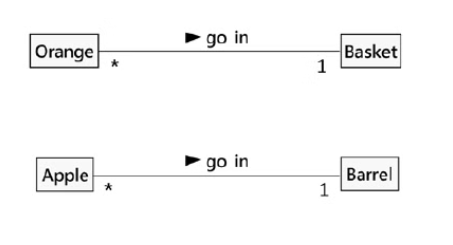

In [143]:
class Orange:
    def __init__(self):
        self.basket = None

class Basket:
    def __init__(self):
        self.oranges = []

    def add_orange(self, orange):
        self.oranges.append(orange)
        orange.basket = self
    def countOranges(self):
        print("Tengo: ", len(self.oranges))

In [144]:
O1=Orange()

O2=Orange()

Baskte_1=Basket()

print(O1)

print(O2)

### Hacer lo mismo para Barrel y Apple 

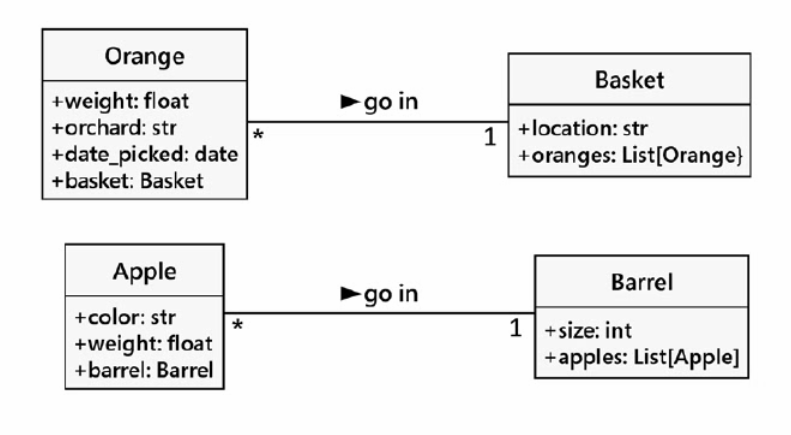

In [145]:
class Apple:
    def __init__(self,color,weight):
        self.color : str=color
        self.weight:float=weight
        self.barrel=None

class Barrel:
    def __init__(self,size):
        self.size:int=size
        self.apples=[]
    def add_apple(self,apple):
        self.apples.append(apple)
        apple.barrel=self
    def countApples(self):
        print("Tengo: ", len(self.apples))

In [146]:
A1=Apple("g",5)
A2=Apple("r",10)

Barrel_1=Barrel(5)

Barrel_1.add_apple(A1)

Barrel_1.countApples()

Tengo:  1


In [147]:
Barrel_1.add_apple(A2)

Barrel_1.countApples()

Tengo:  2


In [148]:
print(A2.barrel)

print(Barrel_1)

In [149]:
A3=Apple("g",7)
print(A3.barrel)

None


## Métodos de Clase: `sell()` y `discard()`

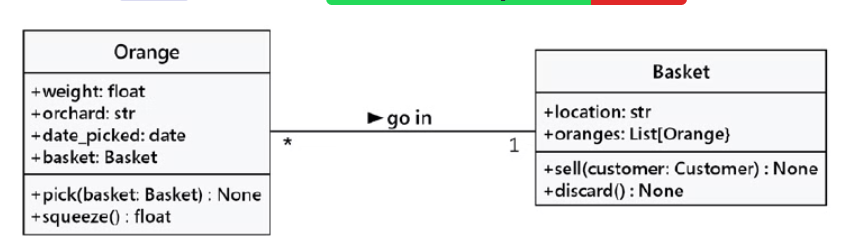

In [150]:
class Orange:
    def __init__(self,weight,orchard):
        self.weight : float = weight
        self.basket = None
        self.orchard :str = orchard
    

In [151]:
O1=Orange(1,"Orch1")
O2=Orange(0.5,"Orch1")
O3=Orange(2,"Orch3")

In [152]:
class Basket:
    def __init__(self,loc):
        self.oranges = []
        self.location :str = loc
        self.sold = False
       
        self.discarded = False

    def add_orange(self, orange):
        self.oranges.append(orange)
        orange.basket = self

    def sell(self):
        if not self.discarded and not self.sold:
            print("Basket sold with the following oranges:")
            for orange in self.oranges:
                print(f" - {orange}")
            self.sold = True
        else: 
            print("Cannot sell a discarded or sold basket.")

    def discard(self):
        if not self.sold:
            self.discarded=True
            print("Basket discarded. Oranges may no longer be sold.")
        else: 
            print("Cannot discard a basket that has already been sold.")



In [153]:
B1=Basket("Riobamba")

B1.add_orange(O1)
B1.add_orange(O2)

B1.sell()



Basket sold with the following oranges:
 - <__main__.Orange object at 0x0000017D13414EC0>
 - <__main__.Orange object at 0x0000017D134172C0>


In [154]:
print(B1.sold)

True


In [155]:
B1.discard()

Cannot discard a basket that has already been sold.


In [156]:
B1.sell()

Cannot sell a discarded or sold basket.


### Hacer para manzanas (Apple)

### Atributos Predefinidos

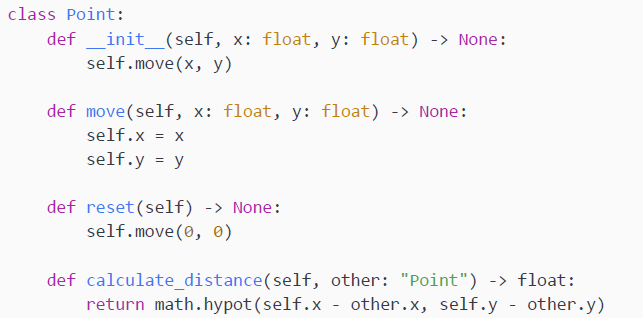

In [157]:
class Point:
    def __init__(self,x:int,y:float):
        self.move(x,y)
    def move(self,x:float,y:float):
        self.x=x
        self.y=y
    def reset(self)->None:
        self.move(0,0)

In [158]:
P1=Point(5,10)
P2=Point(10,20)
P3=Point(15,30) 

In [159]:
class Point:
    def __init__(self,x:int=0,y:float=0):
        self.move(x,y)
    def move(self,x:float,y:float):
        self.x=x
        self.y=y
    def reset(self)->None:
        self.move(0,0)

In [160]:
P4=Point()
print(P4.x,P4.y)

0 0


## Setters y Getters

# Getters

In [161]:
class BankAccount_silly:
    def __init__(self, account_holder: str, balance: float = 0.0):
        self.__account_holder = account_holder
        self.__balance = balance
    def get_account_holder(self):
        return self.__account_holder
    def get_balance(self):
        return self.__balance
    
    
    
    
BP=BankAccount_silly("Juanito", 1000.0) 

print(BP.get_account_holder())
print(BP.get_balance())

BP.__account_holder="Pedro" # No se puede cambiar el nombre de la cuenta porque esta privada
 

Juanito
1000.0


In [162]:
print(BP.get_account_holder())
print(BP.get_balance())
#No se cambio nada 

Juanito
1000.0


## Setters

In [163]:
class BankAccount_silly:
    def __init__(self, account_holder: str, balance: float = 0.0):
        self.__account_holder = account_holder
        self.__balance = balance
    def get_account_holder(self):
        return self.__account_holder
    def get_balance(self):
        return self.__balance
    def set_balance(self, new_balance: float):
        if new_balance >= 0:
            self.__balance = new_balance
        else:
            print("Balance cannot be negative.")
    def set_account_holder(self, new_account_holder: str):
        self.__account_holder = new_account_holder  
        

In [164]:
BP=BankAccount_silly("Juanito", 1000.0) 
BP.set_account_holder("Pedro")
print(BP.get_account_holder())

Pedro


In [165]:
BP.set_account_holder("Pedro Merino")
print(BP.get_account_holder())

Pedro Merino


Esto se realiza en otros lenguajes de programacion como JAVA C++, entre otros 

### Método de Python

In [166]:
class BankAccount:
    def __init__(self, account_holder: str, balance: float = 0.0, password: str = "1234"):
        self._account_holder = account_holder
        self._balance = balance
        self._password = password  # Default password

    @property
    def account_holder(self):
        return self._account_holder

    @property
    def balance(self):
        return self._balance

    @balance.setter
    def balance(self, amount: float):
        if amount < 0:
            raise ValueError("Balance cannot be negative.")
        self._balance = amount

    def deposit(self, amount: float):
        if amount <= 0:
            raise ValueError("Deposit amount must be positive.")
        self._balance += amount
        print(f"Deposited {amount}. New balance: {self._balance}")

    def withdraw(self, amount: float, password: str = None):
        if password != self._password:
            print("Incorrect password.")
        else:
            print("Password is correct.")
            if amount <= 0:
                raise ValueError("Withdrawal amount must be positive.")
            if amount > self._balance:
                raise ValueError("Insufficient funds.")
            self._balance -= amount
            print(f"Withdrew {amount}. New balance: {self._balance}")

In [167]:
BG=BankAccount("Juanito", 1000.0, "1234")
BG.deposit(500)


Deposited 500. New balance: 1500.0


In [168]:
BG.withdraw(200, "1234")

Password is correct.
Withdrew 200. New balance: 1300.0


In [169]:
BG.withdraw(200, "1235") # No se puede retirar porque la contraseña es incorrecta

Incorrect password.


# Importante

## Propiedades con `@property`
Usamos propiedades para controlar el acceso a atributos internos sin romper la interfaz pública.

In [171]:
class NorwegianBlue:
    def __init__(self, name: str):
        self._name = name
        self._state = "resting"

    @property
    def silly(self):
        print(f"Getting {self._name}'s State")
        return self._state

    @silly.setter
    def silly(self, state):
        print(f"Setting {self._name}'s State to {state!r}")
        self._state = state

    @silly.deleter
    def silly(self):
        print(f"{self._name} is pushing up daisies!")
        del self._state